<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

#Этапы работы:
**Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения.**

In [29]:
import numpy as np
import pandas as pd 
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/adtitovich/dsml-17/main/datasets/adult.csv') # датасет - https://www.cs.toronto.edu/~delve/data/adult/desc.html
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data = data.replace(['?'], np.nan).dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


**Постройте 1-2 графика на выбор.**

<Axes: title={'center': 'Процентное соотношение дохода от расы'}, xlabel='race', ylabel='percent'>

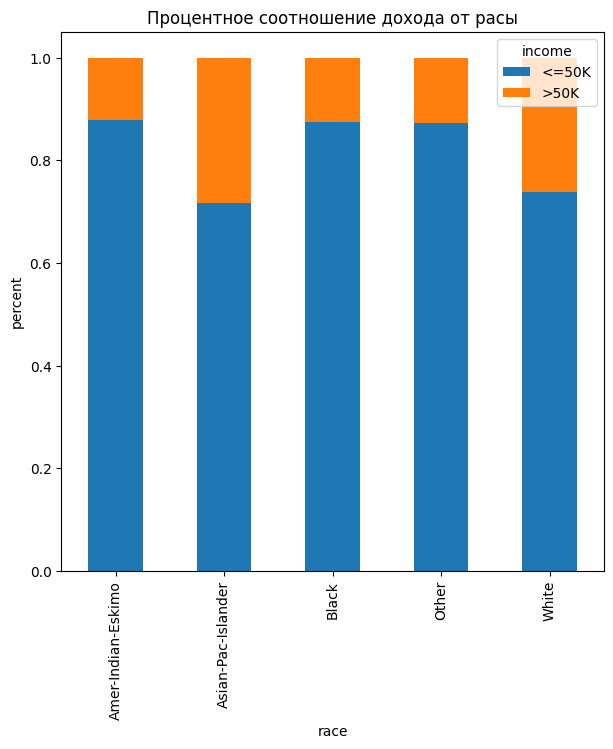

In [11]:
cat_totals = data.groupby(["race","income"])["income"].count().unstack()
pct_df = cat_totals.divide(cat_totals.sum(axis=1), axis=0)
pct_df.plot(kind="bar", stacked=True, title = "Процентное соотношение дохода от расы", figsize = (7,7), ylabel = "percent")

<Axes: title={'center': 'Процентное соотношение дохода от пола'}, xlabel='gender', ylabel='percent'>

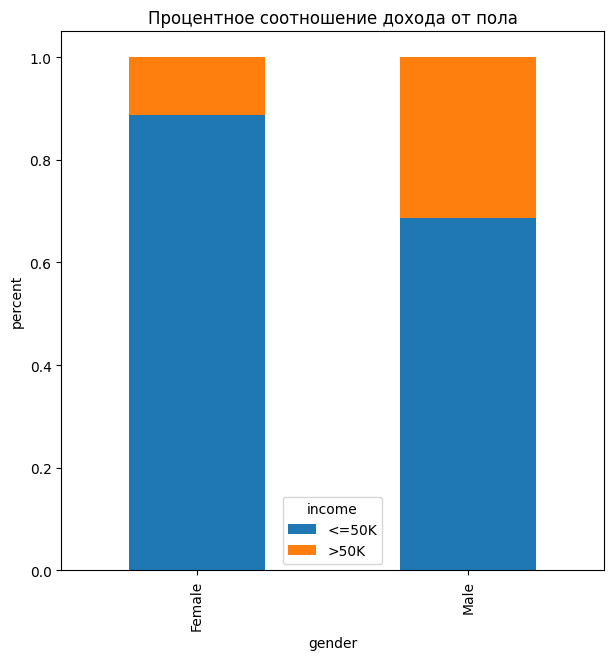

In [12]:
cat_totals = data.groupby(["gender","income"])["income"].count().unstack()
pct_df = cat_totals.divide(cat_totals.sum(axis=1), axis=0)
pct_df.plot(kind="bar", stacked=True, title = "Процентное соотношение дохода от пола", figsize = (7,7), ylabel = "percent")


<Axes: title={'center': 'Процентное соотношение дохода от родной страны'}, xlabel='native-country', ylabel='percent'>

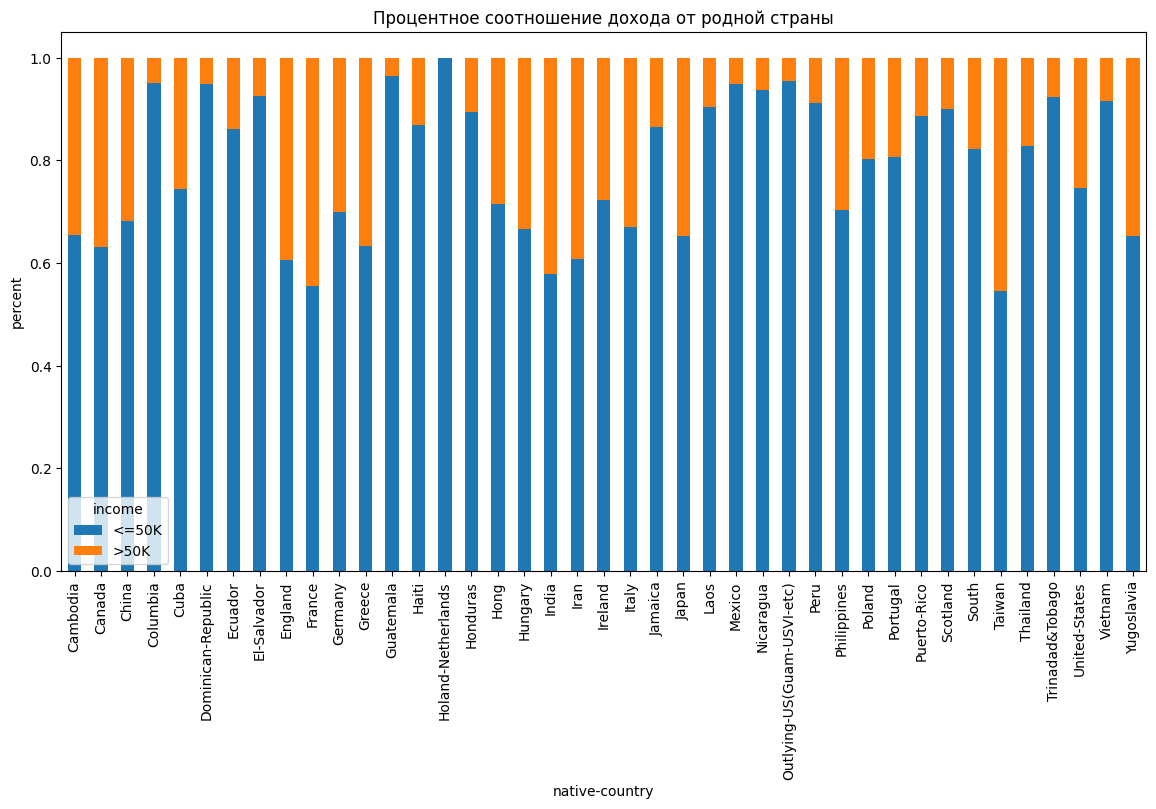

In [17]:
cat_totals = data.groupby(["native-country","income"])["income"].count().unstack()
pct_df = cat_totals.divide(cat_totals.sum(axis=1), axis=0)
pct_df.plot(kind="bar", stacked=True, title = "Процентное соотношение дохода от родной страны", figsize = (14,7), ylabel = "percent")

**Преобразуйте категориальные признаки.**

In [21]:
selectedColumns = data [['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

x = pd.get_dummies (selectedColumns, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [24]:
# записываем в таргетную переменную y преобразованный столбец income

le = LabelEncoder()

le.fit( data['income'])

y = pd.Series (data = le.transform(data['income']))

**Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Обучите модель логистической регрессии**

In [53]:
# обучаем на части датасета (train)

model1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
model1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

**Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей.**

In [54]:
model1.score(x_train, y_train) 

0.8481631976117423

In [55]:
model1.score(x_test,y_test)

0.8495301271420674

**Обучите модель методом опорных векторов. SVM.**

In [56]:
# обучаем на части датасета (train)
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
model2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [57]:
model2.score(x_train, y_train) 

0.8586394670647096

In [58]:
model2.score(x_test, y_test)

0.848424543946932

<table>
  <caption> Результаты работы моделей</caption>
  <thead>
    <tr>
      <th>Метод</th>
      <th>Точность на обуч. данных</th>
      <th>Точность на тестовых данных</th>
      <th>Время обучения</th>
    </tr>
  </thead>>
  <tbody>
    <tr>
      <td>Логистическая регрессия</td>
      <td>0.84816</td>
      <td>0.84953</td>
      <td>1 сек</td>
    </tr>
    <tr>
      <td>Метод опорных векторов</td>
      <td>0.85863</td>
      <td>0.84842</td>
      <td>1 мин 53 сек</td>
    </tr>
  </table>